In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import stochastic_plots as stoch
import examen_ordinaria_PE_2020_2021_plantilla_corregido as pe
import BM_simulators as bm

# Author: <gloria.valle@estudiante.uam.es>

# Ejercicio 1

Consideremos una sede en red *(website)* compuesta por tres páginas cuyas etiquetas son $P_1$, $P_2$, $P_3$, respectivamente.
Para identificar usuarios con un comportamiento atípico supondremos que el patrón de
navegación sigue una cadena de Markov en tiempo continuo. Con el fin estimar los parámetros del modelo
hemos recopilado datos de navegación para un grupo representativo de usuarios. Los datos han sido registrados
el mismo día de la semana y a la misma hora, de forma que podamos asumir que los parámetros
del modelo son constantes con el tiempo.

Los resultados de las mediciones son los siguientes:

* En promedio, los usuarios pasan 2 minutos en P1, 30 segundos en P2 y 1 minuto en P3.

* Las transiciones entre páginas del sitio en red tienen las siguientes probabilidades.

<center>

| Estado inicial / final | P1  | P2  | P3  |
|------------------------|-----|-----|-----|
| P1                     | *   | 0.2 | 0.8 |
| P2                     | 0.3 | *   | 0.7 |
| P3                     | 0.6 | 0.4 | *   |

</center>

**a)** Dibuja el diagrama de transiciones de la cadena de Markov. Etiqueta las transiciones con la probabilidad
correspondiente.

<center><img src="img/ctmc.png" width="400"></center>

**b)** Escribe la matriz de transiciones para el proceso de saltos subyacente (*jump process*).

La matriz de transiciones para el proceso de saltos se determina de la siguiente manera.

$$
\tilde P = (p_{ij}) =\begin{pmatrix}
  0 & 0.2 & 0.8\\
  0.3 & 0 & 0.7\\
  0.6 & 0.4 & 0
\end{pmatrix}.
$$

Escribimos la matriz en $\texttt{numpy}$ y guardamos las $\lambda$ asociadas, las cuales se extraen del tiempo promedio que pasan los usuarios en cada estado, sabiendo que están exponencialmente distribuidos.

In [2]:
# Transition matrix of the jump process
P = np.array([[0. , 0.2, 0.8 ],
              [0.3, 0. , 0.7 ],
              [0.6, 0.4, 0.  ]])

# Lambdas
lambda_rate1, lambda_rate2, lambda_rate3 = 1/2, 2., 1.
lambda_rates = [lambda_rate1, lambda_rate2, lambda_rate3]

**c)** Deriva la distribución estacionaria para el proceso de saltos.

Sabemos que la distribución estacionaria verifica que $\tilde \pi P=\tilde \pi$, siendo $\tilde \pi=(\tilde \pi_1, \tilde \pi_2,\tilde \pi_3)$.
$$
(\tilde \pi_1 \ \tilde \pi_2 \ \tilde \pi_3)=\begin{pmatrix}
  0 & 0.2 & 0.8\\
  0.3 & 0 & 0.7\\
  0.6 & 0.4 & 0
\end{pmatrix}=(\tilde \pi_1 \ \tilde \pi_2 \ \tilde \pi_3).
$$

Lo que nos deja el siguiente sistema de ecuaciones.

$$
\begin{cases}
  \displaystyle
  0.3 \tilde \pi_2 + 0.6 \tilde \pi_3 = \tilde \pi_1,\\
  \displaystyle 0.2 \tilde \pi_1 + 0.4 \tilde \pi_3 = \tilde \pi_2,\\
  0.8 \tilde \pi_1 + 0.7 \tilde \pi_2 = \tilde \pi_3, \\
  \displaystyle \tilde \pi_1 + \tilde \pi_2 + \tilde \pi_3 = 1.
\end{cases}
$$

Resolvemos el sistema de ecuaciones con la calculadora científica, obteniendo la siguiente solución.

$$
\tilde \pi = \Big(\frac{36}{109}, \frac{26}{109}, \frac{47}{109}\Big).
$$


**d)** Deriva la distribución estacionaria para la cadena de Markov en tiempo continuo.

Utilizando la distribución estacionaria de la cadena de Markov en tiempo continuo, $\pi=(\pi_1, \pi_2, \pi_3)$, tenemos la siguiente relación.

$$
\pi_j = \frac{\dfrac{\tilde \pi_j}{\lambda_j}}{S}, \quad j=1,2,3.
$$


Teniendo que $S = \sum_{k=1}^3 \frac{\tilde \pi_k}{\lambda_k}$, obtenemos $S = \frac{132}{109},$

Operando para cada $\pi_i$, tenemos el siguiente cálculo teórico para la distribución estacionaria:

$$
\pi=\left( \frac{6}{11}, \frac{13}{132}, \frac{47}{132}\right).
$$

**e)** Deriva el correspondiente generador infinitesimal.

Para la matriz generadora infinitesimal $G = g_{i,j}$ se cumple que:

$$
g_{ij}=\begin{cases}
  \lambda_ip_{ij}, & i\neq j,\\
  -\lambda_i, & i=j.
\end{cases}
$$

Por tanto obtenemos:

$$
G=\begin{pmatrix}
  -0.5 & 0.1 & 0.4\\
  0.6 & -2 & 1.4\\
  0.6 & 0.4 & -1
\end{pmatrix}.
$$

**f)** A partir del generador infinitesimal deriva la distribución estacionaria del proceso y compárala con el resultado anterior.

Sabemos que la distribución estacionaria verifica que $\pi^TG=0$. Por tanto:

$$
(\pi_1 \ \pi_2 \ \pi_3)\begin{pmatrix}
  -0.5 & 0.1 & 0.4\\
  0.6 & -2 & 1.4\\
  0.6 & 0.4 & -1
\end{pmatrix} = 0.
$$

Lo cual nos genera el siguiente sistema de ecuaciones:

$$
\begin{cases}
  \displaystyle -0.5 \pi_1 + 0.6 \pi_2 + 0.6 \pi_3=0,\\
  \displaystyle 0.1 \pi_1 - 2 \pi_2 + 0.4 \pi_3=0,\\
  \displaystyle 0.4 \pi_1 + 1.4 \pi_2 - 1 \pi_3=0.
\end{cases}
$$

Resolviendo el sistema de ecuaciones obtenemos:
$$
\pi=\left( \frac{6}{11}, \frac{13}{132}, \frac{47}{132}\right).
$$

Observamos que el resultado coincide con el apartado **d)**, debido a la normalidad.

**g)** Simula trayectorias del proceso suponiendo que en el instante $t = 0$ el sistema se encuentra en el
estado $P(t = 0) = P_1$.

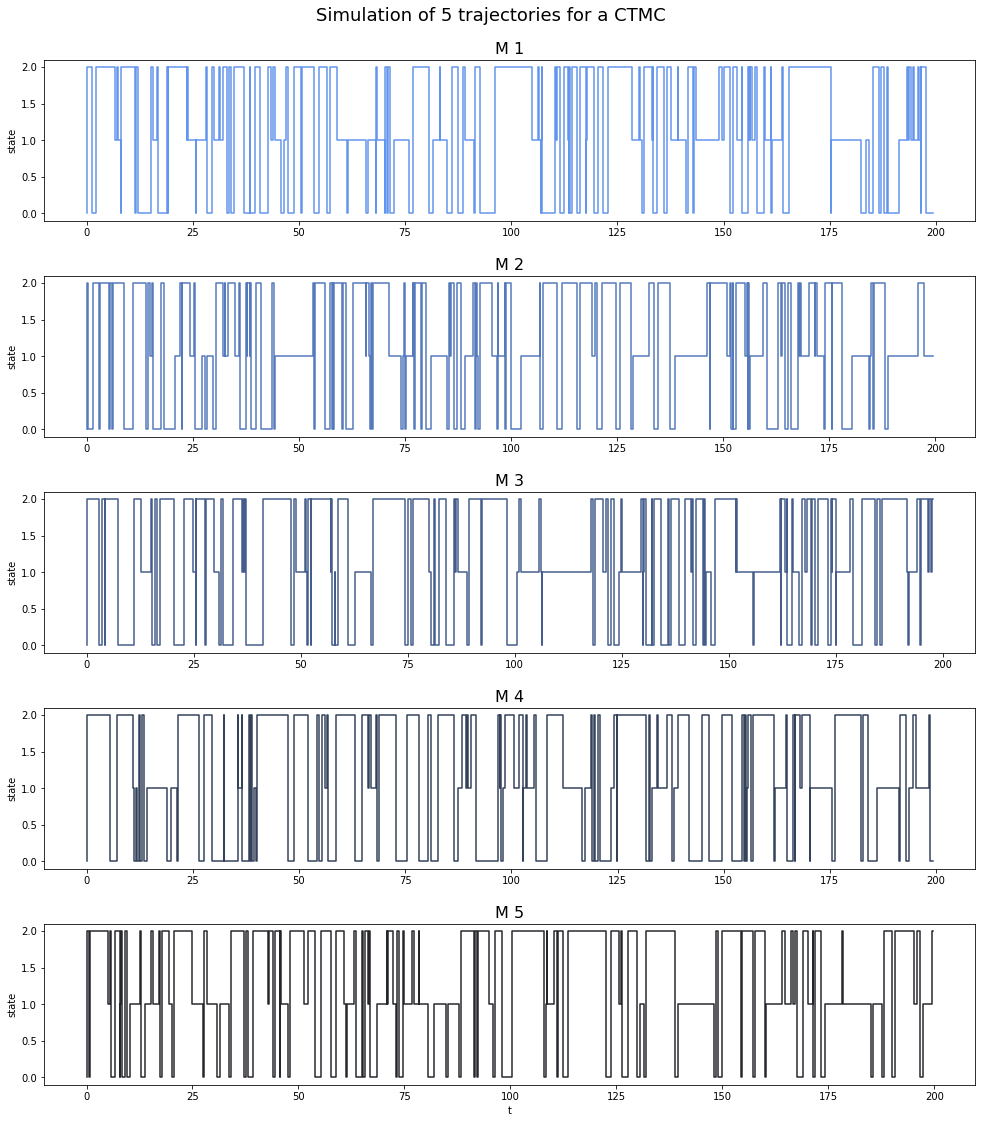

In [3]:
# Simulation of a few trajectories
T, M = 5, 5
t0, t1 = 0., 200.

# Get arrival times and trajectories
arrival_times_CTMC, trajectories_CTMC = pe.simulate_continuous_time_Markov_Chain(P, lambda_rates, 0, M, t0, t1)

# Plot simulation
pe.plot_ctmc_simulation(arrival_times_CTMC, trajectories_CTMC, M)

**h)** Utilizando la secuencia de estados de la cadena de Markov en el régimen estacionario:

   *i.*  Estima la distribución estacionaria del proceso de saltos subyacente a partir de una única trayectoria de la cadena de Markov en tiempo continuo.

In [4]:
# Save arrival times and trajectories
times, trajectories = arrival_times_CTMC[0], trajectories_CTMC[0]

In [5]:
# Stationary distribution of the jump process from a single trajectory

# Get number of states
_, total = np.unique(trajectories, return_counts=True)

# Get distribution
total = total/np.sum(total)

print("Stationary distribution of the jump process from a single trajectory: {}".format(np.around(total, 4)))

Stationary distribution of the jump process from a single trajectory: [0.324  0.2626 0.4134]


*ii.* Estima la distribución estacionaria de la cadena de Markov en tiempo continuo a partir de una única trayectoria del proceso.

In [6]:
# Stationary distribution of the CTMC from a single trajectory ## REVISAR

# Store n states
n_states = len(lambda_rates)

# Add final time to arrival times
times = np.append(np.array(times), t1)

# Compute jumps which correspond to each state
jumps = [np.where(np.array(trajectories) == st)[0] for st in range(n_states)]

# Final time
final_time = [np.sum(times[j+1]) - np.sum(times[j]) for j in jumps]

print("Stationary distribution of the CTMC from a single trajectory: {}".format(np.around(final_time/np.array(t1-t0), 4)))

Stationary distribution of the CTMC from a single trajectory: [0.5148 0.1041 0.3811]


*iii.* Estima la distribución de la cadena de Markov en tiempo continuo en el límite $t \to \infty $ a partir de los estados finales en $M = 1000$ trayectorias simuladas.

In [7]:
# Stationary distribution of the CTMC from the final state in a sample of M trajectories

# Number of trajectories
M = 1000

# New simulation
arrival_times_CTMC, trajectories_CTMC = pe.simulate_continuous_time_Markov_Chain(P, lambda_rates, 0, M, t0, t1)

# Get final distribution
final_states = [tr[-1] for tr in trajectories_CTMC]
_, total = np.unique(final_states, return_counts=True)
total = total/np.sum(total)

print("Stationary distribution of the CTMC from the final state in a sample of M trajectories: {}".format(np.around(total, 4)))

Stationary distribution of the CTMC from the final state in a sample of M trajectories: [0.549 0.107 0.344]


*iv*. Comenta los resultados de los apartados anteriores.

Observando los resultados podemos comprobar que las simulaciones nos ofrecen una buena aproximación respecto del valor teórico calculado. Además, las dos últimas simulaciones son estimaciones de la misma distribución, porque la distribución estacionaria de la cadena de Markov debe coincidir con la distribución límite en tiempo continuo.

**i)** ¿Coinciden las distribuciones estacionarias para una cadena de Markov en tiempo discreto y para el
proceso en tiempo continuo, ambas con el mismo diagrama de transición? En caso de que coincidan
indica la razón. En caso de que no coincidan, define una cadena de Markov en tiempo continuo con el
mismo diagrama de transiciones que tenga la misma distribución estacionaria que la correspondiente
en tiempo discreto.

Las distribuciones estacionarias no coinciden salvo por la siguiente relación de proporcionalidad, teniendo en cuenta la condición suficiente para que ambas sean iguales, esto es, $\lambda_i = \lambda_j$, para todo $i,j$.

$$
\pi_i \propto \frac{\tilde \pi_i}{\lambda_i}, \;\;\;\; i = 1,2,3.
$$

Siendo $\tilde \pi$ la distribución estacionaria en tiempo discreto y ($\pi$) la distribución estacionaria en tiempo continuo.

Asimismo, cuando los parámetros lambda cumplen esta condición, se llega a la siguiente igualdad.

$$
\pi_i = \frac{ \frac{\tilde \pi_i}{\lambda} } { \sum_{i=1}^n \frac{\tilde \pi_i}{\lambda}} = \frac{\tilde \pi_i}{\sum_{i=1}^n \tilde \pi_i} = \tilde \pi_i.
$$

Siendo $n=3$ y $i=1,2,3$.

**j)** En el modelo hemos supuesto que no hay usuarios que accedan desde paginas externas o abandonen
el sitio en red: todas las transiciones son entre páginas dentro del sitio. ¿Cómo podríamos modificar
el modelo de forma que se tengan en cuenta los usuarios que acceden y los que abandonan el sitio
en red durante el tiempo de observación? ¿En qué condiciones el modelo modificado alcanzaría un
estado estacionario?

Para que esta modificación se pueda realizar sería necesario adaptar un estado nuevo al modelo, por ejemplo, $P_e$, de forma que exista conexiones de éste a todas las páginas $P_1, P_2, P_3$ y a la inversa.

## Exercise 2: Simulation of a Brownian bridge process

### Expected value of the standard Wiener process

Consider the expression for the standard Brownian bridge
$$ 
BB_{std}(t) = W(t) - W(1) \, t 
$$

The mean of this process is
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) - W(1) \, t \right]
$$
The expected value operator is linear. Therefore, 
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = \mathbb{E}\left[ W(t) \right] - \mathbb{E}\left[ W(1) \right] t.
$$
Since process $W(t)$ has zero mean $\mathbb{E}\left[ W(t) \right] = 0, \ \forall t \ge 0$
$$ 
\mathbb{E}\left[ BB_{std}(t) \right] = 0, \quad \forall t \in \left[0, 1 \right].
$$

### Covariance function for the standard Brownian bridge

The covariance function for the standard Brownian bridge is defined as
$$ 
\gamma(t,s) = 
 \mathbb{E} \left[\left(BB_{std}(s) - \mathbb{E}\left[ BB_{std}(s) \right] \right)  \left(BB_{std}(t) \right] - \mathbb{E}\left[ BB_{std}(t) \right] \right). 
$$ 
Using 
$$ 
BB_{std}(t) = W(t) - W(1) \, t, \quad \mathbb{E}\left[ BB_{std}(t) \right] = 0
,$$ 
and 
$$
\gamma(s, t) = 
 \mathbb{E} \left[ \left(W(s) - W(1) \, s \right) \left(W(t) - W(1) \,  t \right)\right] =
 \mathbb{E} \left[ W(s) W(t) \right]  + \mathbb{E} \left[W^2(1)\right] s t - \mathbb{E} \left[W(1) W(t)\right] \, s 
- \mathbb{E} \left[W(s) W(1) \right]  \, t. 
$$ 
Finally, taking into account that
$$ 
\mathbb{E}\left[ W(s) W(t) \right] = \min(s, t), $$ 
one gets 
$$ 
\gamma(s, t) =  \min(s, t) + s t - t s - s t = \min(s, t) - s t. 
$$ 


### Mean function for a general Brownian bridge

### Covariance function for a general Brownian bridge

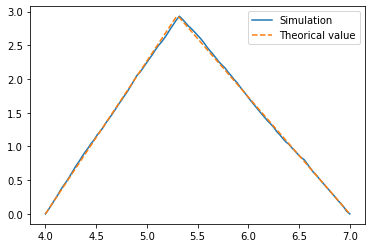

In [8]:
## Brownian bridge simulation

t0, t1 = 4., 7.
B0, B1 = 1., 3.
M, N = 5000, 100
sigma = 2.
t_ref =  5.3

ts, BB = bm.simulate_Brownian_bridge(t0, B0, t1, B1, sigma, M, N)

ts_ref = np.where(ts >= t_ref)[0][0]

covar = [np.mean((BB[:,t] - np.mean(BB[:,t])) * (BB[:,ts_ref] - np.mean(BB[:,ts_ref]))) for t in range(len(ts))]

def cov_th(t, s, sigma, t1, t0):
    return sigma**2 * (np.minimum(t-t0, s-t0) - ((s-t0)*(t-t0))/(t1-t0))

plt.plot(ts, covar, label="Simulation")
plt.plot(ts, cov_th(ts, t_ref, sigma, t1, t0), "--", label="Theorical value")

plt.legend()
plt.show()


# Exercise 3: Simulation of a stochastic volatility model

### Derivation of $\mathbb{E}\left[\sigma(t)\right]$

Consider the Ito SDE
$$
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$$
where $\alpha > 0$ is the reversion rate, $\xi > 0$ is the volatility of the stochastic process $\sigma(t)$. 

Define the process $X(t) = \sigma(t) - \sigma_{\infty}$. Since $ \sigma_{\infty} $ is constant, $dX(t) = d \sigma(t)$, and the equation becomes
$$
d X(t) = - \alpha X(t) dt + \xi dW(t).
$$


Let's take the expected value on both sizes of the equation 
$$
\mathbb{E}\left[dX(t) \right] = \mathbb{E}\left[ - \alpha  X(t) dt + \xi  dW(t) \right].
$$

Using the fact that the expected value is a linear operator, we get
$$
d\mathbb{E} \left[X(t) \right] = - \alpha \mathbb{E}\left[ X(t) \right] dt + \xi \mathbb{E}\left[ dW(t) \right].
$$
Since the Wiener process has zero mean, the equation becomes 
$$
d \mathbb{E} \left[ X(t) \right] = - \alpha  \mathbb{E} \left[ X(t) \right] dt.
$$
Using the method of separation of variables
$$
\frac{1}{ \mathbb{E} \left[ X(t) \right]} d \mathbb{E} \left[ X(t) \right] = - \alpha dt,
$$
the equation can be integrated between $(t_0, X_0)$, where $X_0 = \sigma_0 - \sigma_{\infty}$, and $\left(t,  \mathbb{E} \left[ X(t) \right] \right)$
$$
\int_{X_0}^{\mathbb{E} \left[ X(t) \right]} \frac{1}{ \mathbb{E} \left[ X \right]} d \mathbb{E} \left[ X \right]  = - \alpha \int_{t_0}^t d\tau. 
$$
The solution is
$$
\log \frac{ \mathbb{E}\left[X(t) \right] }{ X_0 } = - \alpha \left(t- t_0 \right).
$$
After some straightforward algebraic manipulation, one obtains
$$
\mathbb{E} \left[ X(t) \right] =  X_0  e^{- \alpha \left(t- t_0 \right)}.
$$
Undoing the change of variable, we obtain
$$
\mathbb{E} \left[ \sigma(t) \right] = \sigma_{\infty} + \left(\sigma_0  - \sigma_{\infty} \right)  e^{- \alpha \left(t- t_0 \right)}.
$$

### Derivation of $\text{Var}\left[\sigma(t)\right]$

### Derivation of the conditional pdf:  $\text{pdf}\left[\left.  t, \sigma(t) \right| t_0, \sigma_0 \right]$

### Simulation of the SDE $
d \sigma(t) = - \alpha \left( \sigma(t) -  \sigma_{\infty} \right) dt + \xi dW(t),   
$


In [9]:
# Simulation of a sample of trajectories

In [10]:
# Mean and stdev of the trajectories simulated           
                              

In [11]:
# Asymptotic stationary pdf of the process

# Exercise 4: Pricing of a European call option

## Pricing by quadrature

In [12]:
# Parameters that characterize underlying 
S0 = 100.0
sigma = 0.3

# Parameters of the EU call option
K = 90.0
T = 2.0

# Risk-free interest rate
r = 0.05

price_EU_call = pe.price_EU_call(S0, K, r, sigma, T)

print('Price = {:.4f}'.format(price_EU_call))

Price = 26.2402


## Monte Carlo pricing of a European call option